In [1]:
'''
s0= Current price
mu = mean returns
sigma = standard dviation of returns
steps = no of steps inb each path
T = length of each path
No_of_paths = no of paths
'''
import numpy as np
def gbm(s0,mu,sigma,steps,T,No_of_paths):
  paths=[]
  dt=T/steps
  for path in range(No_of_paths):
    prices=[s0]
    for step in range(steps):
      prices.append(prices[-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.random.normal(0,np.sqrt(dt))))
    paths.append(prices)
  return paths

print(gbm(100,.10,.5,5,10,3))

[[100, 228.73060205186272, 407.6803120159979, 516.033584504762, 785.0289989838545, 1621.4118279620943], [100, 95.13223732152372, 285.69212129247387, 135.15136014015974, 169.60004770257635, 70.21867966804939], [100, 295.74063045315376, 240.186468478196, 537.4945517442203, 493.579772607474, 486.5021520444087]]


In [26]:
from statistics import mean
def equity_option_price(s0,mu,sigma,steps,T,No_of_paths,strike):
  paths=gbm(s0,mu,sigma,steps,T,No_of_paths)
  profit=[]
  for path in paths:
    profit.append(max(path[-1]-strike,0))
  price=mean(profit)
  return price

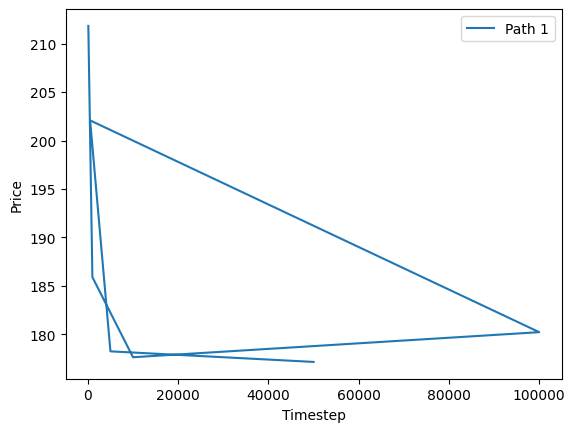

In [31]:
s0= 22378
mu = 10/100
sigma = 12.881/100
steps = 22
T =22/245
No_of_paths=[100,1000,10000,100000,500,5000,50000]
result=[]
for No_of_path in No_of_paths:
  result.append(equity_option_price(s0,mu,sigma,steps,T,No_of_path,strike))


import matplotlib.pyplot as plt
plt.plot(No_of_paths,result)
plt.xlabel('Timestep')
plt.ylabel('Price')
plt.legend(['Path 1', 'Path 2', 'Path 3', 'Path 4', 'Path 5'])
plt.show()